In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from boilerplate import *
from probdist import *

In [3]:
import os

In [4]:
# see https://github.com/scjs/buckeye 
# and esp. https://nbviewer.jupyter.org/github/scjs/buckeye/blob/master/Quickstart.ipynb
import buckeye as b

The goal here is
 - to be able to access Buckeye data where all segment symbols have been converted to use IPA representations.
 - to identify and fix any annotation errors in the Buckeye data.

Given the size of the Buckeye data (it's a 2.5GB corpus - not just a lexicon in a single `.csv` file) and the fact that there's already a nice existing Python package for interfacing and interacting with the corpus, I'm not going to make an IPA'd *copy* of the Buckeye data, just some basic functions for converting representations; later code will determine what abstractions on top of that functionality are useful or necessary.

# File locations and data import 

In [5]:
%pwd

'/mnt/cube/home/AD/emeinhar/wr'

In [6]:
%cd ..

/mnt/cube/home/AD/emeinhar


In [7]:
%ls

anaconda3/     doc/        GitHub/              share/
buckeye/       Downloads/  lexd/                switchboard-lm/
buckeye-zips/  evo/        newdic-nettalk-ipa/  usr/
cmu-ipa/       fisher-lm/  PID/                 wr/


In [8]:
%pwd

'/mnt/cube/home/AD/emeinhar'

In [9]:
buckeye_dir = '/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [10]:
os.chdir(buckeye_dir)
os.getcwd()

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [11]:
files = os.listdir(); files

['s05.zip',
 's02.zip',
 's39.zip',
 's37.zip',
 's30.zip',
 's21.zip',
 's26.zip',
 's28.zip',
 's31.zip',
 's36.zip',
 's38.zip',
 's03.zip',
 's04.zip',
 's15.zip',
 's12.zip',
 's29.zip',
 's27.zip',
 's16.zip',
 's18.zip',
 's24.zip',
 's35.zip',
 's40.zip',
 's09.zip',
 's07.zip',
 's19.zip',
 's17.zip',
 's10.zip',
 's01.zip',
 's06.zip',
 's34.zip']

In [12]:
#27.9s on wittgenstein
speakers = [b.Speaker.from_zip(file) for file in files]
tracks = list(union([set(s.tracks) for s in speakers]))
len(tracks)

193

In [13]:
t = tracks[0]; type(t)
t

buckeye.buckeye.Track

Track("s0303a")

In [14]:
Ws = t.words[:10]
Ws
w = Ws[2]
w

[Pause('{B_TRANS}', 0.0, 0.112794),
 Pause('<IVER>', 0.112794, 31.95653),
 Word("that's", 31.95653, 32.247, ['dh', 'ae', 't', 's'], ['dh', 'eh', 't', 's'], 'DT_VBZ'),
 Word('about', 32.247, 32.569, ['ah', 'b', 'aw', 't'], ['ah', 'b', 'aw'], 'IN'),
 Word('right', 32.569, 32.889, ['r', 'ay', 't'], ['r', 'ay', 't'], 'JJ'),
 Word("that's", 32.889, 33.139, ['dh', 'ae', 't', 's'], ['dh', 'ae', 't', 's'], 'DT_VBZ'),
 Word('about', 33.139, 33.499, ['ah', 'b', 'aw', 't'], ['ah', 'b', 'aw', 'tq'], 'IN'),
 Word('right', 33.499, 33.758003, ['r', 'ay', 't'], ['r', 'ay', 'tq'], 'NN'),
 Pause('<LAUGH>', 33.758003, 35.268741),
 Pause('<SIL>', 35.268741, 39.421)]

Word("that's", 31.95653, 32.247, ['dh', 'ae', 't', 's'], ['dh', 'eh', 't', 's'], 'DT_VBZ')

In [15]:
w.orthography

"that's"

In [16]:
def getOrthography(word):
    return word.orthography

def getPhonemes(word, asDottedString=False):
    phonemes = tuple(word.phonemic)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

def getPhones(word, asDottedString=False):
    phones = tuple(word.phonetic)
    if asDottedString:
        return t2ds(phones)
    return phones

In [17]:
getPhonemes(w)
getPhonemes(w, True)

('dh', 'ae', 't', 's')

'dh.ae.t.s'

In [18]:
def isWord(container):
    return type(container) == b.containers.Word

def getWords(track):
    return [w for w in track.words if isWord(w)]
#     return filter(isWord, track.words)

In [19]:
words = list(union([set(getWords(t)) for t in tracks]))
len(words)

216062

In [20]:
phonemes = set(union([set(getPhonemes(w)) for w in words]))
len(phonemes)
phones = set(union([set(getPhones(w)) for w in words]))
len(phones)

46

79

In [21]:
phonemes

{'aa',
 'ae',
 'ah',
 'ao',
 'aw',
 'ay',
 'b',
 'ch',
 'd',
 'dh',
 'dx',
 'eh',
 'el',
 'em',
 'en',
 'er',
 'ey',
 'f',
 'g',
 'h',
 'hh',
 'ih',
 'iy',
 'jh',
 'k',
 'l',
 'm',
 'n',
 'ng',
 'nx',
 'ow',
 'oy',
 'p',
 'r',
 's',
 'sh',
 't',
 'th',
 'tq',
 'uh',
 'uw',
 'v',
 'w',
 'y',
 'z',
 'zh'}

In [22]:
phones

{'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 'a',
 'aa',
 'aan',
 'ae',
 'aen',
 'ah',
 'ahn',
 'an',
 'ao',
 'aon',
 'aw',
 'awn',
 'ay',
 'ayn',
 'b',
 'ch',
 'd',
 'dh',
 'dx',
 'eh',
 'ehn',
 'el',
 'em',
 'en',
 'eng',
 'er',
 'ern',
 'ey',
 'eyn',
 'f',
 'g',
 'h',
 'hh',
 'hhn',
 'i',
 'id',
 'ih',
 'ihn',
 'iy',
 'iyih',
 'iyn',
 'jh',
 'k',
 'l',
 'm',
 'n',
 'ng',
 'nx',
 'ow',
 'own',
 'oy',
 'oyn',
 'p',
 'q',
 'r',
 's',
 'sh',
 't',
 'th',
 'tq',
 'uh',
 'uhn',
 'uw',
 'uwix',
 'uwn',
 'v',
 'w',
 'x',
 'y',
 'z',
 'zh',
 '{B_TRANS}',
 '{E_TRANS}'}

In [23]:
badPhones = {
 'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 '{B_TRANS}',
 '{E_TRANS}'}
badPhones

{'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 '{B_TRANS}',
 '{E_TRANS}'}

In [24]:
def hasBadPhones(word):
    phones = getPhones(word)
    return any([p in phones for p in badPhones])

In [25]:
badPhonesWords = [w for w in words if hasBadPhones(w)]
len(badPhonesWords)
len(words)
len(badPhonesWords) / len(words)
badPhonesWords[:10]

109

216062

0.0005044848238005757

[Word('well', 417.919319, 418.176897, ['w', 'eh', 'l'], ['IVER', 'w', 'eh', 'l'], 'RB'),
 Word("there's", 578.080986, 578.313305, ['dh', 'eh', 'r', 'z'], ['SIL', 'dh', 'eh', 'r', 'z'], 'EX_VBZ'),
 Word('you', 389.624625, 389.979884, ['y', 'uw'], ['w', 'aa', 'n', 'ih', 'tq', 'SIL', 'y', 'uw'], 'PRP'),
 Word('in', 60.192767, 60.296, ['ih', 'n'], ['SIL', 'ih', 'n'], 'IN'),
 Word('um', 300.31167, 300.79614, ['ah', 'm'], ['SIL', 'ah', 'm'], 'UH'),
 Word('f', 105.718265, 120.490373, ['eh', 'f'], ['IVER'], 'SYM'),
 Word('its', 495.781981, 496.08, ['ih', 't', 's'], ['SIL', 'ih', 's'], 'PRP$'),
 Word('she', 509.277444, 509.405, ['sh', 'iy'], ['SIL', 'sh', 'iy'], 'PRP'),
 Word('of', 554.349756, 554.397898, ['ah', 'v'], ['UNKNOWN'], 'IN'),
 Word('do', 45.821574, 45.91, ['d', 'uw'], ['SIL', 'd', 'ih'], 'VB')]

In [26]:
goodPhones = phones - badPhones
len(phones)
len(goodPhones)
len(badPhones)

79

71

8

# Define a mapping between Buckeye symbols and IPA

## First pass - *documented* mappings

Tables 3-4 (pp 22-23) https://buckeyecorpus.osu.edu/BuckeyeCorpusmanual.pdf define 64 speech symbols for "phonetic" transcription.

In [27]:
len(phonemes)

46

In [28]:
len(phones)
len(goodPhones)

79

71

In [29]:
badPhones
print(goodPhones)

{'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 '{B_TRANS}',
 '{E_TRANS}'}

{'aw', 'ah', 'f', 'ehn', 'ao', 'eng', 'ow', 'tq', 'uh', 'en', 'uwn', 'id', 'uw', 'hh', 'zh', 'own', 'ng', 'sh', 'aon', 'm', 'jh', 's', 'l', 't', 'b', 'uhn', 'ern', 'a', 'an', 'ch', 'w', 'th', 'eyn', 'z', 'dx', 'p', 'k', 'iyih', 'uwix', 'hhn', 'awn', 'iy', 'ihn', 'x', 'dh', 'em', 'ahn', 'oyn', 'ih', 'eh', 'aan', 'ay', 'el', 'y', 'aen', 'g', 'iyn', 'r', 'ae', 'v', 'q', 'er', 'n', 'h', 'i', 'ayn', 'oy', 'd', 'aa', 'ey', 'nx'}


As you can see, however, there are more than 64 phones defined.

In [30]:
phonemes - goodPhones
goodPhones - phonemes

set()

{'a',
 'aan',
 'aen',
 'ahn',
 'an',
 'aon',
 'awn',
 'ayn',
 'ehn',
 'eng',
 'ern',
 'eyn',
 'hhn',
 'i',
 'id',
 'ihn',
 'iyih',
 'iyn',
 'own',
 'oyn',
 'q',
 'uhn',
 'uwix',
 'uwn',
 'x'}

In [31]:
'oyn'[:-1]

'oy'

In [32]:
phonesWithNasalizedVariants = [(each[:-1], each) for each in phones if each[-1] == 'n' and each[:-1] in phones]
phonesWithNasalizedVariants
len(phonesWithNasalizedVariants)

[('eh', 'ehn'),
 ('uw', 'uwn'),
 ('ow', 'own'),
 ('ao', 'aon'),
 ('uh', 'uhn'),
 ('er', 'ern'),
 ('a', 'an'),
 ('ey', 'eyn'),
 ('hh', 'hhn'),
 ('aw', 'awn'),
 ('ih', 'ihn'),
 ('ah', 'ahn'),
 ('oy', 'oyn'),
 ('aa', 'aan'),
 ('ae', 'aen'),
 ('iy', 'iyn'),
 ('ay', 'ayn')]

17

In [33]:
buckeyeUnicodeIPArelation = set([ \
('ao', 'ɔ'), #Note for alignment w/ gating data - the speaker there is from Arizona: ɔ is not in her inventory; is merged into ɑ
('aon', 'ɔ̃'), #n
## ('ah', 'a'), #contrary to the gating data raw dataset explanation, this is the low *back* vowel resulting from the cot-caught merger, not the low *front* vowel (IPA 'a') that some diphthongs start with...
('aa', 'ɑ'),  #
('aan', 'ɑ̃'),  #n
('iy', 'i'), #
('iyn', 'ĩ'), #n
('uw', 'u'), #
('uwn', 'ũ'), #n
('eh', 'ɛ'), #
('ehn', 'ɛ̃'), #n #jupyter doesn't properly display the nasalization diacritic, but there's otherwise nothing wrong
('ih', 'ɪ'), #
('ihn', 'ɪ̃'), #n
('uh', 'ʊ'), #
('uhn', 'ʊ̃'), #n
('ah', 'ʌ'), #    should this be ʌ or ə ???
('ahn', 'ʌ̃'), #n
# ('ah', 'ə'), #    should this be ʌ or ə ???
# ('ahn', 'ə̃'), #n
# ('x', 'ə'),
('ae', 'æ'), #
('aen', 'æ̃'), #n
('ey', 'eɪ'), #
('eyn', 'ẽɪ̃'), #n
('ay', 'aɪ'), #
('ayn', 'aɪ'), #n
('ow', 'oʊ'), #
('own', 'oʊ'), #n
('aw', 'aʊ'), #
('awn', 'aʊ'), #n
('oy', 'ɔɪ'), #
('oyn', 'ɔɪ'), #n
('er', 'ɚ'), #     # two symbols mapping to the same sound - unstressed (#10) r-colored schwa # in buckeye, = unstressed (#10) AND stressed (#46) er (but stressed er receives a different numeric code)
## ('X', 'ɚ'),  #    # two symbols mapping to the same sound - stressed r-colored schwa; X is the symbol in the gating data; 'er' (#46) is the Buckeye symbol
('ern', 'ɚ'), #n     # two symbols mapping to the same sound - unstressed (#10) r-colored schwa # in buckeye, = unstressed (#10) AND stressed (#46) er (but stressed er receives a different numeric code)
('p', 'p'), #
('b', 'b'), #
('t', 't'), #
('d', 'd'), #
('k', 'k'), #
('g', 'g'), #
('ch', 'tʃ'), #
('jh', 'dʒ'), #
('f', 'f'), #
('v', 'v'), #
('th', 'θ'), #
('dh', 'ð'), #
('s', 's'), #
('z', 'z'), #
('sh', 'ʃ'), #
('zh', 'ʒ'), #
('hh', 'h'), #
('m', 'm'), #
('em', 'm̩'), #
('n', 'n'), #
('en', 'n̩'), #
('ng', 'ŋ'), #
('eng', 'ŋ̩'), # see p. 17 of the Buckeye Corpus manual
('l', 'l'), #
('el', 'l̩'), #
# ('r', 'r'), #ɹ
('r', 'ɹ'), #
('dx', 'ɾ'), #
('nx', 'ɾ̃'), #
('y', 'j'), #
('w', 'w'), #
('tq', 'ʔ')#, #
])
print(buckeyeUnicodeIPArelation) 
print(len(buckeyeUnicodeIPArelation))

def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]
print(buckeyeToUnicodeIPA('th'))

# def invertMapping(mydict): 
#     return dict([[val, key] for key,val in mydict.items()])
# def unicodeIPAToBuckeye(unicodeIPAsymbol):
#     return invertMapping( dict(buckeyeUnicodeIPArelation) )[unicodeIPAsymbol]
# print(unicodeIPAToBuckeye('θ'))

{('ay', 'aɪ'), ('ih', 'ɪ'), ('uw', 'u'), ('th', 'θ'), ('aon', 'ɔ̃'), ('g', 'g'), ('zh', 'ʒ'), ('iyn', 'ĩ'), ('m', 'm'), ('em', 'm̩'), ('en', 'n̩'), ('l', 'l'), ('er', 'ɚ'), ('own', 'oʊ'), ('s', 's'), ('n', 'n'), ('eh', 'ɛ'), ('aen', 'æ̃'), ('ow', 'oʊ'), ('aw', 'aʊ'), ('ng', 'ŋ'), ('z', 'z'), ('w', 'w'), ('eyn', 'ẽɪ̃'), ('ihn', 'ɪ̃'), ('uwn', 'ũ'), ('eng', 'ŋ̩'), ('ern', 'ɚ'), ('ae', 'æ'), ('p', 'p'), ('oy', 'ɔɪ'), ('k', 'k'), ('f', 'f'), ('uh', 'ʊ'), ('oyn', 'ɔɪ'), ('d', 'd'), ('iy', 'i'), ('t', 't'), ('uhn', 'ʊ̃'), ('dh', 'ð'), ('r', 'ɹ'), ('y', 'j'), ('hh', 'h'), ('dx', 'ɾ'), ('ah', 'ʌ'), ('sh', 'ʃ'), ('tq', 'ʔ'), ('aa', 'ɑ'), ('ahn', 'ʌ̃'), ('b', 'b'), ('ayn', 'aɪ'), ('ey', 'eɪ'), ('v', 'v'), ('el', 'l̩'), ('aan', 'ɑ̃'), ('ao', 'ɔ'), ('ehn', 'ɛ̃'), ('nx', 'ɾ̃'), ('awn', 'aʊ'), ('ch', 'tʃ'), ('jh', 'dʒ')}
61
θ


Summary of important notes/remaining questions from transcribing Table 2 of the corpus manual:
 1. What the *hell* are all the symbols that aren't documented in the corpus manual and where are they documented?
 2. Should I map `ah` to schwa or wedge?
 3. Syllabic engma isn't in Table 2, but it's mentioned on p. 17 of the corpus manual.

Let's start addressing #1 by looking for any phone symbols that aren't in the relation defined above, seeing how often they occur, which words they're in, and what a reasonable remapping is.

In [34]:
[p for p in phones if p not in list(map(first, buckeyeUnicodeIPArelation)) and p not in badPhones]

['id', 'a', 'an', 'iyih', 'uwix', 'hhn', 'x', 'q', 'h', 'i']

In [35]:
def findWordsWithPhone(phone):
    return [w for w in words if phone in getPhones(w)]

In [36]:
def findWordsWithPhoneme(phoneme):
    return [w for w in words if phoneme in getPhonemes(w)]

In [37]:
def findWordTokensOf(orthographic_word):
    return [w for w in words if getOrthography(w) == orthographic_word]

## Undocumented narrow transcription symbols 

In [38]:
[p for p in phones if p not in list(map(first, buckeyeUnicodeIPArelation)) and p not in badPhones]

['id', 'a', 'an', 'iyih', 'uwix', 'hhn', 'x', 'q', 'h', 'i']

In [39]:
remappings = set()

### `id`

In [40]:
idWords = findWordsWithPhone('id'); idWords
findWordTokensOf('rotted')

[Word('rotted', 24.034135, 24.401962, ['r', 'aa', 't', 'ah', 'd'], ['r', 'ah', 'dx', 'id', 'd'], 'VBN')]

[Word('rotted', 24.034135, 24.401962, ['r', 'aa', 't', 'ah', 'd'], ['r', 'ah', 'dx', 'id', 'd'], 'VBN')]

In [41]:
ed_words = [w for w in words if len(getOrthography(w)) >= 2 and getOrthography(w)[-2:] == 'ed']
len(ed_words)
ed_words[:10]

3386

[Word('stayed', 176.389, 176.615, ['s', 't', 'ey', 'd'], ['s', 't', 'ey', 'd'], 'VBD'),
 Word('geared', 37.968951, 38.305535, ['g', 'ih', 'r', 'd'], ['g', 'iy', 'r', 'd'], 'VBN'),
 Word('crowded', 575.417875, 575.903963, ['k', 'r', 'aw', 'd', 'ah', 'd'], ['k', 'r', 'aw', 'd', 'ih', 'd'], 'VBN'),
 Word('lived', 182.863, 183.078, ['l', 'ih', 'v', 'd'], ['l', 'ih', 'v', 'd'], 'VBD'),
 Word('motivated', 398.208, 398.913, ['m', 'ow', 't', 'ih', 'v', 'ey', 't', 'ah', 'd'], ['m', 'ow', 'dx', 'ah', 'v', 'ey', 'dx', 'ih', 'd'], 'JJ'),
 Word('prejudiced', 425.855928, 426.811256, ['p', 'r', 'eh', 'jh', 'uh', 'd', 'ih', 's', 't'], ['p', 'r', 'eh', 'jh', 'ah', 'd', 'ih', 's', 't'], 'JJ'),
 Word('noticed', 427.887361, 428.300092, ['n', 'ow', 't', 'ih', 's', 't'], ['n', 'ow', 'dx', 'ih', 's', 't'], 'VBD'),
 Word('worked', 430.127776, 430.343431, ['w', 'er', 'k', 't'], ['w', 'er', 'k', 't'], 'VBD'),
 Word('planned', 78.148881, 78.446313, ['p', 'l', 'ae', 'n', 'd'], ['p', 'l', 'ae', 'n', 'd'], 'VBN'),


In [42]:
similar_ed_words = [w for w in ed_words 
                    if len(getPhonemes(w)) >= 3 and 
                       getPhonemes(w)[-1] == 'd' and 
                       (getPhonemes(w)[-3] == 'd' or getPhonemes(w)[-3] == 't')]
len(similar_ed_words)
similar_ed_words[:10]

894

[Word('stayed', 176.389, 176.615, ['s', 't', 'ey', 'd'], ['s', 't', 'ey', 'd'], 'VBD'),
 Word('crowded', 575.417875, 575.903963, ['k', 'r', 'aw', 'd', 'ah', 'd'], ['k', 'r', 'aw', 'd', 'ih', 'd'], 'VBN'),
 Word('motivated', 398.208, 398.913, ['m', 'ow', 't', 'ih', 'v', 'ey', 't', 'ah', 'd'], ['m', 'ow', 'dx', 'ah', 'v', 'ey', 'dx', 'ih', 'd'], 'JJ'),
 Word('tested', 473.34, 473.755, ['t', 'eh', 's', 't', 'ah', 'd'], ['t', 'eh', 's', 't', 'ih', 'd'], 'VBN'),
 Word('decided', 612.83198, 613.252958, ['d', 'ih', 's', 'ay', 'd', 'ah', 'd'], ['d', 'iy', 's', 'ay', 'dx', 'ih', 'd'], 'VBD'),
 Word('emigrated', 38.49653, 38.987788, ['eh', 'm', 'ih', 'g', 'r', 'ey', 't', 'ah', 'd'], ['eh', 'm', 'ah', 'g', 'r', 'ey', 'dx', 'ih'], 'VBD'),
 Word('straightened', 42.204473, 42.559871, ['s', 't', 'r', 'ey', 't', 'en', 'd'], ['s', 'r', 'ey', 't'], 'VBD'),
 Word('wanted', 352.14711, 352.423892, ['w', 'aa', 'n', 't', 'ah', 'd'], ['w', 'ah', 'n', 'ih'], 'VBD'),
 Word('started', 446.58625, 446.936123, ['s'

In [43]:
set([len(getPhonemes(w)) for w in similar_ed_words])
set([len(getPhones(w)) for w in similar_ed_words])

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [44]:
flapped = [w for w in similar_ed_words
           if len(getPhones(w)) >= 3 and
              (getPhones(w)[-2] == 'dx' or getPhones(w)[-3] == 'dx')]
len(flapped)
flapped[:10]

279

[Word('motivated', 398.208, 398.913, ['m', 'ow', 't', 'ih', 'v', 'ey', 't', 'ah', 'd'], ['m', 'ow', 'dx', 'ah', 'v', 'ey', 'dx', 'ih', 'd'], 'JJ'),
 Word('decided', 612.83198, 613.252958, ['d', 'ih', 's', 'ay', 'd', 'ah', 'd'], ['d', 'iy', 's', 'ay', 'dx', 'ih', 'd'], 'VBD'),
 Word('emigrated', 38.49653, 38.987788, ['eh', 'm', 'ih', 'g', 'r', 'ey', 't', 'ah', 'd'], ['eh', 'm', 'ah', 'g', 'r', 'ey', 'dx', 'ih'], 'VBD'),
 Word('started', 366.337, 366.722, ['s', 't', 'aa', 'r', 't', 'ah', 'd'], ['s', 't', 'aa', 'r', 'dx', 'eh', 'd'], 'VBD'),
 Word('graduated', 216.787, 217.247, ['g', 'r', 'ae', 'd', 'y', 'uw', 'ey', 't', 'ah', 'd'], ['g', 'r', 'ae', 'jh', 'uw', 'eh', 'dx', 'ih'], 'VBN'),
 Word('studied', 231.001, 231.307, ['s', 't', 'ah', 'd', 'iy', 'd'], ['s', 't', 'ah', 'dx', 'iy', 'dx'], 'VBD'),
 Word('exacerbated', 352.126, 352.986, ['eh', 'g', 'z', 'ae', 's', 'er', 'b', 'ey', 't', 'ah', 'd'], ['ih', 'g', 'z', 'ae', 's', 'er', 'b', 'ey', 'dx', 'ih', 'd'], 'VBD'),
 Word('dated', 101.04

In [45]:
getPostFlapVowel = lambda phones: phones[-1] if phones[-2] == 'dx' else phones[-2]
postFlapVowels = [getPostFlapVowel(getPhones(w)) for w in flapped]
len(postFlapVowels)
set(postFlapVowels)

279

{'aa', 'ah', 'dx', 'eh', 'el', 'er', 'id', 'ih', 'iy', 'ow', 'uh', 'uw'}

In [46]:
from collections import Counter

In [47]:
Counter(postFlapVowels)

Counter({'ih': 215,
         'eh': 17,
         'iy': 6,
         'el': 6,
         'uh': 3,
         'ah': 14,
         'id': 1,
         'ow': 1,
         'dx': 1,
         'uw': 1,
         'aa': 2,
         'er': 12})

In [48]:
Counter(postFlapVowels)['ih'] / sum( Counter(postFlapVowels).values() )

0.7706093189964157

In [49]:
flappedAndHasFinalStop = [w for w in flapped if getPhones(w)[-1] == 'd' or getPhones(w)[-1] == 't']
len(flappedAndHasFinalStop)
flappedAndHasFinalStop[:10]

194

[Word('motivated', 398.208, 398.913, ['m', 'ow', 't', 'ih', 'v', 'ey', 't', 'ah', 'd'], ['m', 'ow', 'dx', 'ah', 'v', 'ey', 'dx', 'ih', 'd'], 'JJ'),
 Word('decided', 612.83198, 613.252958, ['d', 'ih', 's', 'ay', 'd', 'ah', 'd'], ['d', 'iy', 's', 'ay', 'dx', 'ih', 'd'], 'VBD'),
 Word('started', 366.337, 366.722, ['s', 't', 'aa', 'r', 't', 'ah', 'd'], ['s', 't', 'aa', 'r', 'dx', 'eh', 'd'], 'VBD'),
 Word('exacerbated', 352.126, 352.986, ['eh', 'g', 'z', 'ae', 's', 'er', 'b', 'ey', 't', 'ah', 'd'], ['ih', 'g', 'z', 'ae', 's', 'er', 'b', 'ey', 'dx', 'ih', 'd'], 'VBD'),
 Word('decided', 104.934, 105.373, ['d', 'ih', 's', 'ay', 'd', 'ah', 'd'], ['d', 'ih', 's', 'ay', 'dx', 'eh', 'd'], 'VBD'),
 Word('separated', 114.694, 115.238, ['s', 'eh', 'p', 'ah', 'r', 'ey', 't', 'ah', 'd'], ['s', 'eh', 'p', 'r', 'ey', 'dx', 'ih', 'd'], 'VBD'),
 Word('recorded', 110.528, 110.954, ['r', 'ih', 'k', 'ow', 'r', 'd', 'ah', 'd'], ['er', 'k', 'ow', 'r', 'dx', 'ih', 'd'], 'VBN'),
 Word('started', 320.6, 320.956, 

In [50]:
postFlapVowels_HasFinalStop = [getPostFlapVowel(getPhones(w)) for w in flappedAndHasFinalStop]
len(postFlapVowels_HasFinalStop)
set(postFlapVowels_HasFinalStop)
Counter(postFlapVowels_HasFinalStop)
Counter(postFlapVowels_HasFinalStop)['ih'] / sum(Counter(postFlapVowels_HasFinalStop).values())

194

{'aa', 'ah', 'eh', 'el', 'er', 'id', 'ih', 'iy', 'uh'}

Counter({'ih': 157,
         'eh': 13,
         'el': 4,
         'id': 1,
         'aa': 2,
         'ah': 7,
         'iy': 2,
         'er': 7,
         'uh': 1})

0.8092783505154639

`ih` seems like a reasonable remapping even if it's not clear what on earth `id` was supposed to convey in the first place.

In [51]:
buckeyeToUnicodeIPA('ih')

'ɪ'

In [52]:
remappings.add(('id', buckeyeToUnicodeIPA('ih')))
remappings

{('id', 'ɪ')}

### `eng`

In [53]:
syllabic_n_words = findWordsWithPhone('eng')
len(syllabic_n_words)

123

### `x`

In [54]:
findWordsWithPhone('x')

[Word('yknow', 248.168, 248.477, ['y', 'uw', 'n', 'ow'], ['y', 'ih', 'x', 'n', 'ow'], 'PRP_VBP'),
 Word('ten', 530.572, 530.769, ['t', 'eh', 'n'], ['t', 'eh', 'x', 'n'], 'CD')]

In [55]:
len(findWordTokensOf('yknow'))
set(map(lambda w: tuple(getPhones(w)),
            findWordTokensOf('yknow')))

2847

{('SIL', 'y', 'eh'),
 ('SIL', 'y', 'ih', 'n', 'ao'),
 ('SIL', 'y', 'nx', 'aw'),
 ('ah',),
 ('ah', 'n', 'ah'),
 ('ah', 'n', 'ow'),
 ('ah', 'nx', 'ow'),
 ('ah', 'ow'),
 ('ah', 'y', 'eh', 'nx', 'ow'),
 ('ah', 'y', 'ih', 'nx', 'ow'),
 ('ay', 'ih', 'nx', 'ah'),
 ('ay', 'y', 'ih', 'nx', 'ow'),
 ('ay', 'y', 'ow'),
 ('ch', 'ih', 'n', 'ow'),
 ('ch', 'y', 'ah', 'nx', 'ow', 'em'),
 ('d', 'ih', 'nx', 'ow'),
 ('d', 'y', 'ih', 'nx', 'ah'),
 ('dh', 'eh', 'n', 'y', 'ow'),
 ('eh',),
 ('eh', 'n', 'ah'),
 ('eh', 'n', 'ao'),
 ('eh', 'n', 'ow'),
 ('eh', 'nx', 'ow'),
 ('ehn', 'ao'),
 ('en', 'ow'),
 ('er', 'n', 'hh', 'ah'),
 ('er', 'nx', 'ow'),
 ('ey', 'ah'),
 ('ey', 'ih', 'n', 'ow'),
 ('ey', 'n', 'ow'),
 ('g', 'y', 'ih', 'nx', 'ow'),
 ('hh', 'eh', 'n', 'aw', 'm'),
 ('hh', 'ih', 'n', 'ah'),
 ('hh', 'ih', 'n', 'ow'),
 ('hh', 'ih', 'nx', 'ah'),
 ('hh', 'ih', 'nx', 'ow'),
 ('hh', 'iy', 'nx', 'ow'),
 ('hh', 'y', 'ah', 'n', 'ow'),
 ('hh', 'y', 'ah', 'nx', 'ow'),
 ('hh', 'y', 'eh', 'nx', 'ow'),
 ('hh', 'y', 'ih', 

In [56]:
len(findWordTokensOf('ten'))
set(map(lambda w: tuple(getPhones(w)),
            findWordTokensOf('ten')))

104

{('t', 'eh', 'm'),
 ('t', 'eh', 'n'),
 ('t', 'eh', 'n', 'ah'),
 ('t', 'eh', 'nx'),
 ('t', 'eh', 'x', 'n'),
 ('t', 'ey', 'ng'),
 ('t', 'ih', 'eh', 'n')}

I have no idea what this is, and since it only occurs in two wordform tokens, I don't see any harm in just deleting both instances of `x`.

**NB:** This will require either overwriting data (something I already said I don't want to do) or slightly non-trivial rewriting (and consistent use!) of accessor functions (like `getPhones`) specifically to mask/intercept these two word tokens with `x`.

### `h`

In [57]:
findWordsWithPhone('h')
len(findWordsWithPhone('h'))

[Word('is', 82.48, 82.58, ['ih', 'z'], ['i', 'h', 'z'], 'VBZ'),
 Word('have', 118.74, 118.942, ['hh', 'ae', 'v'], ['h', 'ae', 'v'], 'VBP'),
 Word('he', 1.660725, 1.954066, ['hh', 'iy'], ['h', 'iy'], 'PRP'),
 Word('oh', 541.451747, 541.73, ['ow'], ['ow', 'h'], 'NN'),
 Word('ohio', 488.038875, 489.013875, ['ow', 'hh', 'ay', 'ow'], ['ow', 'h', 'ay', 'ow'], 'NNP'),
 Word('nineties', 479.92, 480.444, ['n', 'ay', 'n', 't', 'iy', 'z'], ['n', 'ay', 'nx', 'iy', 'h'], 'NNS'),
 Word('that', 194.991, 195.32, ['dh', 'ae', 't'], ['h', 'ae', 't'], 'DT'),
 Word('of', 542.168, 542.298, ['ah', 'v'], ['eh', 'h'], 'IN'),
 Word("he's", 221.692091, 221.966073, ['hh', 'iy', 'z'], ['h', 'iy', 'z'], 'PRP_VBZ'),
 Word('career', 452.859125, 453.393743, ['k', 'ah', 'r', 'ih', 'r'], ['k', 'er', 'h', 'r', 'ih', 'r'], 'NN'),
 Word('why', 516.598598, 516.760655, ['w', 'ay'], ['h', 'w', 'ay'], 'WRB'),
 Word('um-hum', 524.880878, 525.218274, ['em', 'hh', 'em'], ['em', 'h', 'm'], 'UH'),
 Word('want', 568.488861, 568.701

15

In [58]:
len(findWordsWithPhone('hh'))
findWordsWithPhone('hh') #documented version of [h]

9183

[Word('who', 511.212528, 511.321702, ['hh', 'uw'], ['hh', 'uw'], 'WP'),
 Word('have', 570.214125, 570.414125, ['hh', 'ae', 'v'], ['hh', 'ae', 'v'], 'VBP'),
 Word('who', 511.633939, 511.769314, ['hh', 'uw'], ['hh', 'uw'], 'WP'),
 Word('help', 511.943992, 512.106661, ['hh', 'eh', 'l', 'p'], ['hh', 'eh', 'l', 'p'], 'VB'),
 Word('house', 350.501701, 350.978717, ['hh', 'aw', 's'], ['hh', 'aw', 's'], 'NN'),
 Word('have', 461.296, 461.476, ['hh', 'ae', 'v'], ['hh', 'ae', 'v'], 'VBP'),
 Word('he', 579.252, 579.359, ['hh', 'iy'], ['hh', 'iy'], 'PRP'),
 Word('have', 167.050985, 167.257833, ['hh', 'ae', 'v'], ['hh', 'ae', 'v'], 'VBP'),
 Word('have', 335.36, 335.577, ['hh', 'ae', 'v'], ['hh', 'ae', 'v'], 'VBP'),
 Word('homework', 335.577, 336.124, ['hh', 'ow', 'm', 'w', 'er', 'k'], ['hh', 'ow', 'm', 'w', 'er', 'k'], 'NN'),
 Word('have', 517.271681, 517.504221, ['hh', 'ae', 'v'], ['hh', 'ae', 'v'], 'VBP'),
 Word('has', 76.336313, 76.536074, ['hh', 'ae', 'z'], ['hh', 'ae', 's'], 'VBZ'),
 Word('had',

limit_output extension: Maximum message size of 20000 exceeded with 84402 characters

Since there are 15 word tokens with phonetic transcriptions featuring `h` and 9.1k with `hh`, and I can't find any documentation indicating what might differentiate `h` from `hh`, I'm going to map `h` to `hh`.

In [59]:
remappings

{('id', 'ɪ')}

In [60]:
remappings.add(('h', buckeyeToUnicodeIPA('hh')))
remappings

{('h', 'h'), ('id', 'ɪ')}

In [61]:
{pair for pair in remappings if pair[0] == 'h'}

{('h', 'h')}

### `hhn`

In [62]:
findWordsWithPhone('hhn')
list(map(getPhones,
         findWordTokensOf('service')))

[Word('service', 67.447, 67.999, ['s', 'er', 'v', 'ih', 's'], ['s', 'er', 'v', 'ah', 'hhn'], 'NN')]

[('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'er', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'ah', 'r', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'uh', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'ah', 'r', 'v', 'eh', 's'),
 ('s', 'er', 'v', 'r', 'ih', 's'),
 ('s', 'er', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'eh', 's'),
 ('s', 'er', 'v', 'ah', 'hhn'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'eh', 's'),
 ('s', 'ah', 'r', 'v', 'ah', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('s', 'er', 'ah', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('sh', 'er', 'ah', 's'),
 ('s', 'er', 'v', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('s', 'er', 'v', 'ih', 's'),
 ('s', 'er', 'v', 'ah', 's'),
 ('s', 'er', '

I'm going to map `hh` to nasalized [h].

In [63]:
remappings.add(('hhn', 'h̃'))
remappings

{('h', 'h'), ('hhn', 'h̃'), ('id', 'ɪ')}

### `iyih`

In [64]:
findWordsWithPhone('iyih')
list(map(getPhones,
         findWordTokensOf('everything')))

[Word('everything', 571.265, 571.728, ['eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'], ['eh', 'r', 'iyih', 'th', 'eh', 'ng'], 'NN')]

[('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'r', 'iy', 'th', 'ey'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'iy', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'r', 'iy', 't', 'ih', 'ng'),
 ('eh', 'r', 'v', 'r', 'ih', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'r', 'ih', 'th', 'eh', 'ng'),
 ('eh', 'v', 'r', 'iy', 't', 'ih', 'ng'),
 ('eh', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ey', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('n', 'eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ey', 'ng'),
 ('eh', 'v', 'r', 'iy', 'th', 'ih', 'ng'),
 ('eh', 'r', 'iy', 'th', 'iy', 'ng

This is bizzare, undocumented (as far as I can tell), and there's only one token, so I'm going to remap it to `iy`.

In [65]:
remappings.add(('iyih', buckeyeToUnicodeIPA('iy')))
remappings

{('h', 'h'), ('hhn', 'h̃'), ('id', 'ɪ'), ('iyih', 'i')}

### `i`

In [66]:
findWordsWithPhone('i')

[Word('is', 82.48, 82.58, ['ih', 'z'], ['i', 'h', 'z'], 'VBZ'),
 Word('wanted', 13.435598, 13.868345, ['w', 'aa', 'n', 't', 'ah', 'd'], ['w', 'ah', 'n', 'i', 'd'], 'VBD')]

In [67]:
len(list(map(getPhones,
         findWordTokensOf('wanted'))))

121

In [68]:
list(map(getPhones,
         findWordTokensOf('wanted')))

[('w', 'ah', 'n', 'ih'),
 ('w', 'aa', 'nx', 'ih', 'd'),
 ('w', 'aa', 'n', 'eh'),
 ('w', 'ah', 'n', 'eh', 'd'),
 ('w', 'aa', 'n', 'd'),
 ('w', 'aa', 'nx'),
 ('w', 'aa', 'n', 'ih', 'tq'),
 ('w', 'ah', 'nx', 'ah', 'd'),
 ('w', 'aa', 'nx', 'ih', 'd'),
 ('w', 'aa', 'n', 'ih', 'd'),
 ('w', 'ah', 'nx', 'ih', 'd'),
 ('m', 'w', 'ah', 'nx', 'eh', 'd'),
 ('w', 'ah', 'nx', 'ah', 'd'),
 ('w', 'ah'),
 ('w', 'aa', 'nx', 'eh', 'd'),
 ('w', 'ah', 'n'),
 ('w', 'aa', 'nx', 'ah', 'd'),
 ('w', 'ao', 'nx', 'ah', 'dx'),
 ('w', 'aa', 'n'),
 ('w', 'aa', 'nx'),
 ('w', 'aa', 'nx', 'ih', 'd'),
 ('w', 'aa', 'nx', 'ih', 'd'),
 ('w', 'ah', 'n'),
 ('w', 'ah', 'n', 'i', 'd'),
 ('w', 'aa', 'nx', 'ah', 'd'),
 ('w', 'ah', 'nx', 'ih', 'd'),
 ('w', 'aa', 'nx', 'ih', 'd'),
 ('w', 'aa', 'n', 'ih', 'd'),
 ('w', 'ah', 'n', 'ih', 'd'),
 ('w', 'aa', 'n', 'ih', 'dx'),
 ('w', 'aa', 'nx', 'ah', 'dx'),
 ('w', 'aa', 'nx', 'eh', 'd'),
 ('w', 'aa', 'nx', 'ih', 'dx'),
 ('w', 'ah', 'n'),
 ('w', 'aa', 'n', 'eh', 'd'),
 ('w', 'aa', 'n', 'd

In [69]:
len(list(map(getPhones,
         findWordTokensOf('is'))))

1466

In [70]:
list(map(getPhones,
         findWordTokensOf('is')))

[('ih', 'z'),
 ('ih', 's'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 's'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ah', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 's'),
 ('ih', 'z'),
 ('ih', 's'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'zh'),
 ('ah', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'zh'),
 ('ih', 's'),
 ('z',),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('i', 'h', 'z'),
 ('l', 'ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 's'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('uw', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 'z'),
 ('ih', 's'),
 ('ih', 's'),
 ('ih', 'z'),


Given there are only two tokens of `i` and the distribution over other narrow phonetic transcriptions of these two words, I'm going to map `i` to `ih`.

In [71]:
remappings.add(('i', buckeyeToUnicodeIPA('ih')))
remappings

{('h', 'h'), ('hhn', 'h̃'), ('i', 'ɪ'), ('id', 'ɪ'), ('iyih', 'i')}

### `q`

In [72]:
findWordsWithPhone('q')
list(map(getPhones,
         findWordTokensOf('network')))

[Word('network', 511.393, 511.773, ['n', 'eh', 't', 'w', 'er', 'k'], ['n', 'eh', 'q', 'w', 'er', 'k'], 'NN')]

[('n', 'eh', 'tq', 'w', 'ah', 'r', 'k'),
 ('n', 'eh', 'tq', 'w', 'er', 'k'),
 ('n', 'eh', 't', 'w', 'er', 'r', 'k'),
 ('n', 'eh', 'w', 'ah', 'r', 'k'),
 ('n', 'eh', 'tq', 'w', 'ah', 'r', 'k'),
 ('n', 'eh', 'tq', 'w', 'er', 'k'),
 ('n', 'eh', 'tq', 'w', 'ah', 'r', 'k'),
 ('n', 'n', 'eh', 't', 'w', 'er', 'k'),
 ('n', 'eh', 'tq', 'w', 'er', 'k'),
 ('n', 'eh', 'q', 'w', 'er', 'k'),
 ('n', 'eh', 'tq', 'w', 'er', 'k')]

Given there is exactly one word token in the whole corpus with `q`, and all the other narrow transcriptions of this word (well nearly all - all that have a stop in the coda of the first syllable) have `tq`, I'm going to assume 'q' is a typo, and map `q` to `tq`.

In [73]:
remappings.add(('q', buckeyeToUnicodeIPA('tq')))
remappings

{('h', 'h'), ('hhn', 'h̃'), ('i', 'ɪ'), ('id', 'ɪ'), ('iyih', 'i'), ('q', 'ʔ')}

### `a`

In [74]:
findWordsWithPhone('a')

[Word('a', 186.939359, 186.992622, ['ey'], ['a'], 'DT'),
 Word('on', 387.436, 387.652, ['aa', 'n'], ['a', 'n'], 'IN'),
 Word('everyone', 180.716, 181.017, ['eh', 'v', 'r', 'iy', 'w', 'ah', 'n'], ['eh', 'v', 'r', 'a', 'w', 'ah', 'n'], 'NN'),
 Word('towards', 507.821, 508.073, ['t', 'ah', 'w', 'ow', 'r', 'd', 'z'], ['t', 'w', 'r', 'a', 'd', 'z'], 'IN')]

In [75]:
Counter(list(map(lambda w: tuple(getPhones(w)),
                 findWordTokensOf('a'))))
list(map(lambda w: tuple(getPhones(w)),
         findWordTokensOf('a')))

Counter({('ah',): 2849,
         ('ih',): 765,
         ('p',): 1,
         ('iy',): 13,
         ('er',): 31,
         ('eh',): 316,
         ('el',): 55,
         ('ey',): 266,
         ('aa',): 113,
         ('ae',): 11,
         ('uh',): 36,
         ('eng',): 3,
         ('uw',): 14,
         (): 3,
         ('ow',): 8,
         ('t',): 1,
         ('r', 'ih'): 1,
         ('v', 'ah'): 1,
         ('nx', 'ah'): 2,
         ('n', 'ah'): 4,
         ('dx', 'ah'): 1,
         ('m',): 1,
         ('w',): 1,
         ('d',): 1,
         ('a',): 1,
         ('ay',): 7,
         ('aon',): 1,
         ('em',): 5,
         ('hh',): 1,
         ('en',): 8,
         ('dh', 'ey'): 1,
         ('m', 'ah'): 1,
         ('k', 'ah'): 1,
         ('y', 'ih'): 1,
         ('y', 'ah'): 1,
         ('eh', 'm'): 1,
         ('er', 'ah'): 1,
         ('SIL', 'ah'): 1,
         ('s',): 2,
         ('uw', 'm', 'ey', 'nx', 'ah', 'hh', 'ah'): 1,
         ('dx', 'ih'): 1,
         ('ah', 'm'): 1,
         (

[('ah',),
 ('ih',),
 ('ah',),
 ('ih',),
 ('p',),
 ('ih',),
 ('iy',),
 ('ah',),
 ('er',),
 ('ah',),
 ('eh',),
 ('eh',),
 ('er',),
 ('ah',),
 ('ih',),
 ('eh',),
 ('ih',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('eh',),
 ('eh',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('el',),
 ('er',),
 ('ih',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ey',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('eh',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('eh',),
 ('ih',),
 ('eh',),
 ('eh',),
 ('ah',),
 ('ah',),
 ('ey',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('el',),
 ('ey',),
 ('el',),
 ('ah',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ah',),
 ('ah',),
 ('ih',),
 ('ih',),
 ('ih',),
 ('ah',),
 ('aa',),
 ('ah',),
 ('ah',),
 ('el',),
 ('eh',),
 ('ih',),
 

It looks like `ah` is the most plausible remapping candidate for the first wordform token.

In [76]:
onCounts = Counter(list(map(lambda w: tuple(getPhones(w)),
                 findWordTokensOf('on'))))
onCounts
onCounts.most_common()

Counter({('ah', 'n'): 173,
         ('ao', 'n'): 198,
         ('aa', 'n'): 539,
         ('ae', 'n'): 1,
         ('y', 'aa', 'n'): 1,
         ('aa', 'm'): 17,
         ('ah', 'nx'): 14,
         ('aa', 'nx'): 78,
         ('ao', 'nx'): 23,
         ('ao',): 3,
         ('ow', 'n'): 4,
         ('aw', 'n'): 2,
         ('aa',): 11,
         ('aan',): 15,
         ('dx', 'aa', 'nx'): 1,
         ('iy', 'aa', 'n'): 1,
         ('aon',): 8,
         ('aa', 'tq'): 1,
         ('aw',): 1,
         ('r', 'ao', 'n'): 1,
         ('ah',): 6,
         ('aa', 'ng'): 6,
         ('ay', 'n'): 2,
         ('aa', 'w'): 1,
         ('ih', 'ah', 'n'): 1,
         ('ahn',): 6,
         ('eh', 'n'): 3,
         ('ah', 'm'): 9,
         ('ao', 'm'): 2,
         ('ao', 'nx', 'ah'): 1,
         ('ey',): 1,
         ('ao', 'ah', 'n'): 2,
         ('ow', 'ao', 'n'): 1,
         ('aa', 'n', 'm'): 1,
         ('a', 'n'): 1,
         ('n',): 2,
         ('en',): 4,
         ('ao', 'n', 'm'): 1,
         ('aa'

[(('aa', 'n'), 539),
 (('ao', 'n'), 198),
 (('ah', 'n'), 173),
 (('aa', 'nx'), 78),
 (('ao', 'nx'), 23),
 (('aa', 'm'), 17),
 (('aan',), 15),
 (('ah', 'nx'), 14),
 (('aa',), 11),
 (('ah', 'm'), 9),
 (('aon',), 8),
 (('ah',), 6),
 (('aa', 'ng'), 6),
 (('ahn',), 6),
 (('ow', 'n'), 4),
 (('en',), 4),
 (('ao',), 3),
 (('eh', 'n'), 3),
 (('aw', 'n'), 2),
 (('ay', 'n'), 2),
 (('ao', 'm'), 2),
 (('ao', 'ah', 'n'), 2),
 (('n',), 2),
 (('ae', 'n'), 1),
 (('y', 'aa', 'n'), 1),
 (('dx', 'aa', 'nx'), 1),
 (('iy', 'aa', 'n'), 1),
 (('aa', 'tq'), 1),
 (('aw',), 1),
 (('r', 'ao', 'n'), 1),
 (('aa', 'w'), 1),
 (('ih', 'ah', 'n'), 1),
 (('ao', 'nx', 'ah'), 1),
 (('ey',), 1),
 (('ow', 'ao', 'n'), 1),
 (('aa', 'n', 'm'), 1),
 (('a', 'n'), 1),
 (('ao', 'n', 'm'), 1),
 (('aa', 'nx', 'ah'), 1),
 (('ao', 'ng'), 1),
 (('ih', 'n'), 1),
 (('d', 'ahn'), 1),
 (('aan', 'n'), 1),
 (('ihn',), 1),
 (('ao', 'w'), 1)]

`aa` is far and away the most common vowel for 'on', so it seems reasonable to remap the one token of `a` in 'on' to `aa`; on the other hand, `ah` seems to be the most parsimonious mapping across all of the different wordform tokens with `a` in the narrow transcriptions.

In [77]:
Counter(list(map(lambda w: tuple(getPhones(w)),
                 findWordTokensOf('everyone'))))
# list(map(lambda w: tuple(getPhones(w)),
#          findWordTokensOf('everyone')))

Counter({('eh', 'r', 'ah', 'w', 'ah', 'n'): 1,
         ('eh', 'v', 'er', 'ih', 'n'): 1,
         ('eh', 'r', 'w', 'ah', 'n'): 1,
         ('eh', 'v', 'er', 'b', 'ah', 'n'): 1,
         ('eh', 'v', 'r', 'iy', 'w', 'ah', 'n'): 11,
         ('eh', 'v', 'r', 'uw', 'w', 'ah', 'n'): 2,
         ('eh', 'v', 'r', 'iy', 'b', 'w', 'ah', 'n'): 1,
         ('eh', 'v', 'r', 'ah', 'w', 'ah', 'n'): 1,
         ('eh', 'v', 'r', 'iy', 'w', 'ah', 'nx'): 2,
         ('eh', 'v', 'r', 'ih', 'w', 'ah', 'n'): 9,
         ('eh', 'r', 'iy', 'w', 'ah'): 1,
         ('eh', 'v', 'r', 'ih', 'w', 'ah', 'nx'): 1,
         ('eh', 'v', 'er', 'w', 'ah', 'n'): 2,
         ('eh', 'v', 'r', 'iy', 'ah', 'n'): 1,
         ('eh', 'r', 'ih', 'w', 'ah', 'n'): 1,
         ('eh', 'v', 'r', 'a', 'w', 'ah', 'n'): 1,
         ('ah', 'v', 'er', 'ah', 'n'): 1,
         ('eh', 'v', 'er', 'w', 'ah', 'nx'): 1,
         ('eh', 'v', 'r', 'ih', 'w', 'ah', 'm'): 1,
         ('eh', 'v', 'er', 'w', 'ah', 'm'): 1,
         ('eh', 'v', 'w', 'a

It looks like the best fit for `a` among productions of 'everyone' is `ah`.

In [78]:
Counter(list(map(lambda w: tuple(getPhones(w)),
                 findWordTokensOf('towards'))))

Counter({('t', 'ao', 'r', 'd', 'z'): 7,
         ('t', 'w', 'er', 'd', 's'): 1,
         ('t', 'ow', 'er', 'd', 'z'): 1,
         ('t', 'w', 'ah', 'r', 'd', 's'): 1,
         ('t', 'w', 'ao', 'r', 'd', 's'): 1,
         ('t', 'w', 'er', 'z'): 1,
         ('t', 'w', 'ao', 'r', 'd', 'z'): 2,
         ('t', 'w', 'ow', 'r', 'd', 'z'): 1,
         ('t', 'ao', 'r', 'd', 's'): 2,
         ('t', 'ao', 'r', 'z'): 2,
         ('t', 'w', 'r', 'a', 'd', 'z'): 1})

I'm going to guess that schwa (`ah`) is the best choice for what to remap `a` to.

I'm going to remap all instances of `a` to `ah`:

In [79]:
remappings.add(('a', buckeyeToUnicodeIPA('ah')))
remappings

{('a', 'ʌ'),
 ('h', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('iyih', 'i'),
 ('q', 'ʔ')}

### `an`

In [80]:
findWordsWithPhone('an')
list(map(getPhones,
         findWordTokensOf('twenty')))

[Word('twenty', 378.817, 379.275, ['t', 'w', 'eh', 'n', 't', 'iy'], ['t', 'w', 'an', 'nx', 'iy'], 'CD')]

[('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'ey'),
 ('t', 'w', 'eh', 'n', 'iy'),
 ('t', 'w', 'ah', 'n', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'iy'),
 ('t', 'w', 'eh', 'ih'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'eh', 'n', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('w', 'ih'),
 ('t', 'w', 'eh', 'nx', 'iy'),
 ('t', 'w', 'ah', 'nx', 'iy'),
 ('t', 'w

I'm going to remap `an` to `ahn`:

In [81]:
remappings.add(('an', buckeyeToUnicodeIPA('ahn')))
remappings

{('a', 'ʌ'),
 ('an', 'ʌ̃'),
 ('h', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('iyih', 'i'),
 ('q', 'ʔ')}

### `uwix`

In [82]:
findWordsWithPhone('uwix')
list(map(getPhones,
         findWordTokensOf('computer')))

[Word('computer', 191.083, 191.463, ['k', 'ah', 'm', 'p', 'y', 'uw', 't', 'er'], ['k', 'm', 'p', 'y', 'uwix', 'dx', 'er'], 'NN')]

[('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'ah', 'r'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 't', 'ah', 'r'),
 ('k', 'em', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ih', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'em', 'p', 'y', 'uw', 't', 'er'),
 ('k', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'eh', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'em', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ah', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'ih', 'm', 'p', 'y', 'ih', 't', 'er'),
 ('k', 'eh', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'eh', 'm', 'p', 'y', 'uw', 'dx', 'er'),
 ('k', 'eh', 'm', 'p', 'y', 'ih', 'dx', 'er'),
 ('k', 'em', 'p', 'y', 'uw'

I'm going to remap `uwix` to `uw`.

In [83]:
remappings.add(('uwix', buckeyeToUnicodeIPA('uw')))
remappings

{('a', 'ʌ'),
 ('an', 'ʌ̃'),
 ('h', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('iyih', 'i'),
 ('q', 'ʔ'),
 ('uwix', 'u')}

## Altogether

Below are all the phone level mappings. (Note also that all the phonemes are a subset of the phones.)

In [84]:
buckeyeUnicodeIPArelation.update(remappings)

In [85]:
buckeyeUnicodeIPArelation

{('a', 'ʌ'),
 ('aa', 'ɑ'),
 ('aan', 'ɑ̃'),
 ('ae', 'æ'),
 ('aen', 'æ̃'),
 ('ah', 'ʌ'),
 ('ahn', 'ʌ̃'),
 ('an', 'ʌ̃'),
 ('ao', 'ɔ'),
 ('aon', 'ɔ̃'),
 ('aw', 'aʊ'),
 ('awn', 'aʊ'),
 ('ay', 'aɪ'),
 ('ayn', 'aɪ'),
 ('b', 'b'),
 ('ch', 'tʃ'),
 ('d', 'd'),
 ('dh', 'ð'),
 ('dx', 'ɾ'),
 ('eh', 'ɛ'),
 ('ehn', 'ɛ̃'),
 ('el', 'l̩'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('eng', 'ŋ̩'),
 ('er', 'ɚ'),
 ('ern', 'ɚ'),
 ('ey', 'eɪ'),
 ('eyn', 'ẽɪ̃'),
 ('f', 'f'),
 ('g', 'g'),
 ('h', 'h'),
 ('hh', 'h'),
 ('hhn', 'h̃'),
 ('i', 'ɪ'),
 ('id', 'ɪ'),
 ('ih', 'ɪ'),
 ('ihn', 'ɪ̃'),
 ('iy', 'i'),
 ('iyih', 'i'),
 ('iyn', 'ĩ'),
 ('jh', 'dʒ'),
 ('k', 'k'),
 ('l', 'l'),
 ('m', 'm'),
 ('n', 'n'),
 ('ng', 'ŋ'),
 ('nx', 'ɾ̃'),
 ('ow', 'oʊ'),
 ('own', 'oʊ'),
 ('oy', 'ɔɪ'),
 ('oyn', 'ɔɪ'),
 ('p', 'p'),
 ('q', 'ʔ'),
 ('r', 'ɹ'),
 ('s', 's'),
 ('sh', 'ʃ'),
 ('t', 't'),
 ('th', 'θ'),
 ('tq', 'ʔ'),
 ('uh', 'ʊ'),
 ('uhn', 'ʊ̃'),
 ('uw', 'u'),
 ('uwix', 'u'),
 ('uwn', 'ũ'),
 ('v', 'v'),
 ('w', 'w'),
 ('y', 'j'),
 ('z', 'z'),
 ('

In [86]:
len(buckeyeUnicodeIPArelation)

70

In [87]:
len(dict(buckeyeUnicodeIPArelation))

70

In [88]:
list(buckeyeUnicodeIPArelation)

[('ay', 'aɪ'),
 ('ih', 'ɪ'),
 ('uw', 'u'),
 ('th', 'θ'),
 ('aon', 'ɔ̃'),
 ('g', 'g'),
 ('zh', 'ʒ'),
 ('iyn', 'ĩ'),
 ('m', 'm'),
 ('em', 'm̩'),
 ('en', 'n̩'),
 ('l', 'l'),
 ('a', 'ʌ'),
 ('hhn', 'h̃'),
 ('er', 'ɚ'),
 ('own', 'oʊ'),
 ('s', 's'),
 ('n', 'n'),
 ('eh', 'ɛ'),
 ('aen', 'æ̃'),
 ('ow', 'oʊ'),
 ('aw', 'aʊ'),
 ('id', 'ɪ'),
 ('ng', 'ŋ'),
 ('z', 'z'),
 ('w', 'w'),
 ('eyn', 'ẽɪ̃'),
 ('ihn', 'ɪ̃'),
 ('uwn', 'ũ'),
 ('eng', 'ŋ̩'),
 ('uwix', 'u'),
 ('ern', 'ɚ'),
 ('ae', 'æ'),
 ('p', 'p'),
 ('oy', 'ɔɪ'),
 ('k', 'k'),
 ('f', 'f'),
 ('i', 'ɪ'),
 ('uh', 'ʊ'),
 ('oyn', 'ɔɪ'),
 ('d', 'd'),
 ('iy', 'i'),
 ('t', 't'),
 ('uhn', 'ʊ̃'),
 ('dh', 'ð'),
 ('r', 'ɹ'),
 ('y', 'j'),
 ('hh', 'h'),
 ('dx', 'ɾ'),
 ('ah', 'ʌ'),
 ('sh', 'ʃ'),
 ('q', 'ʔ'),
 ('tq', 'ʔ'),
 ('aa', 'ɑ'),
 ('ahn', 'ʌ̃'),
 ('b', 'b'),
 ('ayn', 'aɪ'),
 ('an', 'ʌ̃'),
 ('ey', 'eɪ'),
 ('v', 'v'),
 ('el', 'l̩'),
 ('aan', 'ɑ̃'),
 ('ao', 'ɔ'),
 ('ehn', 'ɛ̃'),
 ('nx', 'ɾ̃'),
 ('h', 'h'),
 ('awn', 'aʊ'),
 ('ch', 'tʃ'),
 ('jh', 'dʒ'),
 ('iy

In [89]:
[pair for pair in buckeyeUnicodeIPArelation if pair[0] == 'h']

[('h', 'h')]

In [90]:
buckeyeToUnicodeIPA('uwn')

'ũ'

In [91]:
set(map(buckeyeToUnicodeIPA, phonemes))
len(set(map(buckeyeToUnicodeIPA, phonemes)))

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'l̩',
 'm',
 'm̩',
 'n',
 'n̩',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔ',
 'ɔɪ',
 'ɚ',
 'ɛ',
 'ɪ',
 'ɹ',
 'ɾ',
 'ɾ̃',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'ʔ',
 'θ'}

45

In [92]:
def buckeyeToUnicodeIPA(buckeyeSymbol):
    mapping = dict(buckeyeUnicodeIPArelation)
    #print(mapping)
    return mapping[buckeyeSymbol]

In [143]:
def get_orthography(word):
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
        phones = tuple(map(buckeyeToUnicodeIPA,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [94]:
findWordsWithPhone('x')

[Word('yknow', 248.168, 248.477, ['y', 'uw', 'n', 'ow'], ['y', 'ih', 'x', 'n', 'ow'], 'PRP_VBP'),
 Word('ten', 530.572, 530.769, ['t', 'eh', 'n'], ['t', 'eh', 'x', 'n'], 'CD')]

In [95]:
findWordsWithPhone('x')[0]
getPhones(findWordsWithPhone('x')[0])
filter_x(getPhones(findWordsWithPhone('x')[0]))

Word('yknow', 248.168, 248.477, ['y', 'uw', 'n', 'ow'], ['y', 'ih', 'x', 'n', 'ow'], 'PRP_VBP')

('y', 'ih', 'x', 'n', 'ow')

('y', 'ih', 'n', 'ow')

In [96]:
get_phones(findWordsWithPhone('x')[0])

'j.ɪ.n.oʊ'

In [97]:
w
getPhones(w)

Word("that's", 31.95653, 32.247, ['dh', 'ae', 't', 's'], ['dh', 'eh', 't', 's'], 'DT_VBZ')

('dh', 'eh', 't', 's')

# Sanity check: orthographic and phoneme token counts

## Orthographic token counts

In [98]:
orthographic_wordform_tokens = list(map(getOrthography, words))
len(orthographic_wordform_tokens)
orthographic_wordform_types = set(orthographic_wordform_tokens)
len(orthographic_wordform_types)

216062

7999

In [99]:
orthographic_wordform_counts = Counter(orthographic_wordform_tokens)

In [100]:
threshold = 5
uncommon_wordform_types = [w for w in orthographic_wordform_types if orthographic_wordform_counts[w] <= threshold]
len(uncommon_wordform_types)

6030

In [101]:
threshold = 1
uncommon_wordform_types = [w for w in orthographic_wordform_types if orthographic_wordform_counts[w] <= threshold]
len(uncommon_wordform_types)

3441

## Phoneme token counts

In [102]:
def seqToMultiSet(seq):
    return Counter(seq)

def dsToMultiSet(ds):
    return seqToMultiSet(ds2t(ds))

In [103]:
def buckeye_word_to_phoneme_multiset(w):
    return dsToMultiSet(get_phonemes(w))

In [104]:
phoneme_counts_by_word = map(buckeye_word_to_phoneme_multiset,
                             words)
phoneme_counts = reduce(lambda c_0, c_1: c_0 + c_1, phoneme_counts_by_word)
phoneme_counts.most_common()

[('t', 55227),
 ('n', 47606),
 ('ʌ', 43276),
 ('ɪ', 39406),
 ('i', 31451),
 ('d', 30982),
 ('s', 29203),
 ('æ', 27293),
 ('ɹ', 27058),
 ('aɪ', 22617),
 ('l', 22589),
 ('ð', 21932),
 ('oʊ', 21775),
 ('k', 21746),
 ('m', 20226),
 ('ɛ', 19584),
 ('u', 19158),
 ('z', 17331),
 ('w', 17140),
 ('eɪ', 16504),
 ('ɑ', 13602),
 ('b', 13068),
 ('j', 12182),
 ('v', 11423),
 ('h', 11114),
 ('ɚ', 10421),
 ('p', 10402),
 ('f', 9024),
 ('ŋ', 8836),
 ('g', 7371),
 ('θ', 6476),
 ('aʊ', 4575),
 ('dʒ', 3787),
 ('ʃ', 3436),
 ('ʊ', 3213),
 ('l̩', 3170),
 ('tʃ', 2631),
 ('m̩', 1523),
 ('n̩', 989),
 ('ɔɪ', 373),
 ('ʒ', 171),
 ('ɾ', 29),
 ('ɔ', 5),
 ('ɾ̃', 3),
 ('ʔ', 1)]

In [105]:
# set(map(buckeyeToUnicodeIPA, phonemes))
set(phoneme_counts.keys()) - set(map(buckeyeToUnicodeIPA, phonemes))

set()

The bottom four 'phonemes' are concerning:
 1. What wordforms have a tap/flap (much less *nasalized ones*) in their phonemic representation?
 2. Why are there five phonemic counts of `ɔ`? Or rather, why are there *any* counts at all?
 3. Why is there any phonemic count for glottal stops at all?

### What wordforms have "phonemic" taps/flaps?

In [106]:
{pair for pair in buckeyeUnicodeIPArelation if pair[1] == 'ɾ'}
# unicodeIPAToBuckeye('ɾ')

{('dx', 'ɾ')}

In [107]:
from  more_itertools import unique_everseen

In [108]:
ws_w_phonemic_oral_taps = findWordsWithPhoneme('dx')
len(ws_w_phonemic_oral_taps)
ws_w_phonemic_oral_taps
list(unique_everseen(map(get_orthography, ws_w_phonemic_oral_taps)))

29

[Word('yadda', 75.953, 76.175, ['y', 'aa', 'dx', 'ah'], ['y', 'aa', 'dx', 'ih'], 'NN'),
 Word('yadda', 76.175, 76.476, ['y', 'aa', 'dx', 'ah'], ['y', 'aa', 'dx', 'ah'], 'NN'),
 Word('ritalin', 174.745062, 175.25298, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'ih', 'l', 'ih', 'n'], 'NNP'),
 Word('ritalin', 179.420679, 179.861127, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'el', 'ih', 'n'], 'NNP'),
 Word('ritalin', 192.487312, 192.89125, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'ah', 'l', 'ih', 'n'], 'NNP'),
 Word('doody', 545.156, 545.556, ['d', 'uw', 'dx', 'iy'], ['d', 'uw', 'dx', 'iy'], 'NN'),
 Word('ritalin', 3.346469, 3.710408, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'ih', 'l', 'ih', 'n'], 'NNP'),
 Word('ritalin', 6.63431, 6.933111, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'el', 'ah'], 'NNP'),
 Word('ritalin', 28.897205, 29.367509, ['r', 'ih', 'dx', 'ah', 'l', 'ah', 'n'], ['r', 'ih', 'dx', 'el', '

['yadda',
 'ritalin',
 'doody',
 'skateboarding',
 'littlest',
 'lotta',
 'shoulda',
 'introvertal',
 'disparity',
 'shut-outs',
 'dont',
 'exporting',
 'tattletale',
 'out-r-inn']

In [109]:
list(map(get_phonemes, findWordTokensOf('board')))
list(map(get_phonemes, findWordTokensOf('skateboarding')))

['b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d',
 'b.oʊ.ɹ.d']

['s.k.eɪ.t.b.oʊ.ɹ.ɾ.ɪ.ŋ']

I don't think it's farfetched to think the oral stop phoneme at the end of `skateboarding` should be `d`.

In [110]:
list(map(get_phonemes, findWordTokensOf('little')))
list(map(get_phonemes, findWordTokensOf('littlest')))

['l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',
 'l.ɪ.t.l̩',

['l.ɪ.ɾ.l̩.ʌ.s.t']

...or that the stop in the middle of `littlest` should be `t`...

In [111]:
list(map(get_phonemes, findWordTokensOf('lotta')))

['l.ɑ.ɾ.ʌ', 'l.ɑ.ɾ.ʌ', 'l.ɑ.ɾ.ʌ']

...`t`

In [112]:
list(map(get_phonemes, findWordTokensOf('yadda')))

['j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ', 'j.ɑ.ɾ.ʌ']

...`t` or `d`? Unclear, but I don't think the decision is consequential; I'll go with `d`.

In [113]:
list(map(get_phonemes, findWordTokensOf('shoulda')))

['ʃ.ʊ.ɾ.ʌ']

...`d`

In [114]:
list(map(get_phonemes, findWordTokensOf('introvertal')))

['ɪ.n.t.ɹ.oʊ.v.ɚ.ɾ.ʌ.l', 'ɪ.n.t.ɹ.oʊ.v.ɚ.ɾ.ʌ.l']

...`t`

In [115]:
list(map(get_phonemes, findWordTokensOf('shut-outs')))

['ʃ.ʌ.ɾ.aʊ.t.s']

...`t`

In [116]:
list(map(get_phonemes, findWordTokensOf('disparity')))

['d.ɪ.s.p.ɛ.ɹ.ʌ.ɾ.i']

...`t`

In [117]:
list(map(get_phonemes, findWordTokensOf('dont')))

['ɾ.oʊ.n.ʔ']

...`d`

In [118]:
list(map(get_phonemes, findWordTokensOf('exporting')))

['ɛ.k.s.p.oʊ.ɹ.ɾ.ʌ.ŋ']

...`t`

In [119]:
list(map(get_phonemes, findWordTokensOf('out-r-inn')))

['aʊ.ɾ.ɚ.ɪ.n', 'aʊ.ɾ.ɚ.ɪ.n']

...`t`

In [120]:
list(map(get_phonemes, findWordTokensOf('tattletale')))

['t.æ.ɾ.l̩.t.eɪ.l']

...`t`

In [121]:
list(map(get_phonemes, findWordTokensOf('doody')))

['d.u.ɾ.i']

...`t` or `d`? I'll go with `d`.

In [122]:
list(map(get_phonemes, findWordTokensOf('ritalin')))

['ɹ.ɪ.ɾ.ʌ.l.ʌ.n',
 'ɹ.ɪ.ɾ.ʌ.l.ʌ.n',
 'ɹ.ɪ.ɾ.ʌ.l.ʌ.n',
 'ɹ.ɪ.ɾ.ʌ.l.ʌ.n',
 'ɹ.ɪ.ɾ.ʌ.l.ʌ.n',
 'ɹ.ɪ.ɾ.ʌ.l.ʌ.n']

...`t`

In [123]:
ws_w_phonemic_nasal_taps = findWordsWithPhoneme('nx')
len(ws_w_phonemic_nasal_taps)
ws_w_phonemic_nasal_taps

3

[Word('chanukah', 159.269773, 159.735166, ['hh', 'aa', 'nx', 'ah', 'k', 'ah'], ['hh', 'aa', 'nx', 'ay', 'k', 'eh'], 'NN'),
 Word('heroin', 429.416906, 429.846641, ['hh', 'eh', 'r', 'ow', 'ih', 'nx'], ['hh', 'eh', 'r', 'ow', 'ih', 'nx'], 'NN'),
 Word('Ellimen', 266.068276, 266.358689, ['eh', 'l', 'ah', 'm', 'ah', 'nx'], ['eh', 'l', 'ah', 'm', 'ah', 'nx'], 'NNS')]

In [124]:
list(map(get_phonemes, findWordTokensOf('heroin')))

['h.ɛ.ɹ.oʊ.ɪ.ɾ̃']

...`n`

In [125]:
findWordTokensOf('Ellimen')
list(map(get_phonemes, findWordTokensOf('Ellimen')))

[Word('Ellimen', 262.952305, 263.32626, ['eh', 'l', 'ah', 'm', 'eh', 'n'], ['eh', 'l', 'ah', 'm', 'eh', 'n'], 'NNS'),
 Word('Ellimen', 266.068276, 266.358689, ['eh', 'l', 'ah', 'm', 'ah', 'nx'], ['eh', 'l', 'ah', 'm', 'ah', 'nx'], 'NNS')]

['ɛ.l.ʌ.m.ɛ.n', 'ɛ.l.ʌ.m.ʌ.ɾ̃']

...`n`

In [126]:
list(map(get_phonemes, findWordTokensOf('chanukah')))

['h.ɑ.ɾ̃.ʌ.k.ʌ']

...`n`

### Phonemic `ɔ`

In [127]:
ws_w_phonemic_ao = findWordsWithPhoneme('ao')
len(ws_w_phonemic_ao)
ws_w_phonemic_ao

5

[Word('chorus', 319.195812, 319.560625, ['k', 'ao', 'r', 'ah', 's'], ['k', 'ao', 'r', 'ah', 's'], 'NN'),
 Word('alzheimers', 602.284247, 602.945162, ['ao', 'l', 's', 'ay', 'm', 'er', 'z'], ['ao', 'l', 's', 'ay', 'm', 'er', 'z'], 'NNS'),
 Word("law's", 501.140839, 501.46342, ['l', 'ao', 'z'], ['l', 'ao', 'z'], 'NNS'),
 Word("law's", 502.435298, 502.726862, ['l', 'ao', 'z'], ['l', 'ao', 'z'], 'NNS'),
 Word("law's", 503.729756, 504.036829, ['l', 'ao', 'z'], ['l', 'ao', 'z'], 'NNS')]

In [128]:
list(map(get_phonemes, findWordTokensOf('chorus')))

['k.ɔ.ɹ.ʌ.s']

...`ɑ`

In [129]:
list(map(get_phonemes, findWordTokensOf('alzheimers')))

['ɔ.l.s.aɪ.m.ɚ.z']

...`ɑ`

In [130]:
list(map(get_phonemes, findWordTokensOf("law's")))

['l.ɔ.z', 'l.ɔ.z', 'l.ɔ.z']

...`ɑ`

### Phonemic glottal stops???

In [131]:
ws_w_glottal_stop_as_phoneme = findWordsWithPhoneme('tq')
a_word = ws_w_glottal_stop_as_phoneme[0]
a_word

Word('dont', 48.17348, 48.470962, ['dx', 'ow', 'n', 'tq'], ['dx', 'ow', 'n', 'tq'], 'VBP_RB')

In [132]:
get_phonemes(a_word)

'ɾ.oʊ.n.ʔ'

In [133]:
a_word.orthography
a_word.phonemic

'dont'

['dx', 'ow', 'n', 'tq']

In [134]:
findWordTokensOf("don't")

[Word("don't", 504.057668, 504.157049, ['d', 'ow', 'n', 't'], ['dx', 'own'], 'VBP_RB'),
 Word("don't", 373.051375, 373.138375, ['d', 'ow', 'n', 't'], ['ow', 'n'], 'VBP_RB'),
 Word("don't", 37.949625, 38.144091, ['d', 'ow', 'n', 't'], ['dx', 'ow', 'n'], 'VBP_RB'),
 Word("don't", 375.229375, 375.40169, ['d', 'ow', 'n', 't'], ['dx', 'ow', 'n'], 'VBP_RB'),
 Word("don't", 259.195, 259.375, ['d', 'ow', 'n', 't'], ['d', 'ow', 'n'], 'VBP_RB'),
 Word("don't", 187.344, 187.634, ['d', 'ow', 'n', 't'], ['d', 'ow', 'n', 'tq'], 'VBP_RB'),
 Word("don't", 187.964, 188.176, ['d', 'ow', 'n', 't'], ['d', 'ow', 'n'], 'VBP_RB'),
 Word("don't", 209.637081, 209.872875, ['d', 'ow', 'n', 't'], ['d', 'ow', 'n'], 'VBP_RB'),
 Word("don't", 64.447379, 64.55, ['d', 'ow', 'n', 't'], ['ah', 'm'], 'VBP_RB'),
 Word("don't", 67.741234, 67.996, ['d', 'ow', 'n', 't'], ['dx', 'ow', 'n', 'tq'], 'VBP_RB'),
 Word("don't", 88.26146, 88.316408, ['d', 'ow', 'n', 't'], ['ow', 'n'], 'VBP_RB'),
 Word("don't", 38.33175, 38.495473, [

limit_output extension: Maximum message size of 20000 exceeded with 88463 characters

...this should be `t` and the orthographic word should be `don't`.

### Fixes

I'm going to write word-specific patches in my own functions for retrieving
 - orthographic wordform
 - phoneme sequences

In [136]:
# replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
# t2ds(map(replacer, ds2t('ɾ.oʊ.n.ʔ')))
# t2ds(map(replacer, ds2t('h.ɑ.ɾ̃.ʌ.k.ʌ')))
# t2ds(map(replacer, ds2t('k.ɔ.ɹ.ʌ.s')))

In [147]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [138]:
findWordsWithPhoneme('tq')[0]
get_phonemes(findWordsWithPhoneme('tq')[0])
list(map(get_phonemes, findWordTokensOf('chorus')))[0]
list(map(get_phonemes, findWordTokensOf('chanukah')))[0]

Word('dont', 48.17348, 48.470962, ['dx', 'ow', 'n', 'tq'], ['dx', 'ow', 'n', 'tq'], 'VBP_RB')

'd.oʊ.n.t'

'k.ɑ.ɹ.ʌ.s'

'h.ɑ.n.ʌ.k.ʌ'

# Phoneme inventory vs. phone inventory

In [141]:
#4.4s wittgenstein
phoneme_inventory = union(map(lambda w: set(ds2t(get_phonemes(w))), words))
len(phoneme_inventory)
phoneme_inventory

41

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'l̩',
 'm',
 'm̩',
 'n',
 'n̩',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔɪ',
 'ɚ',
 'ɛ',
 'ɪ',
 'ɹ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'θ'}

In [150]:
#2.73s wittgenstein
phone_inventory = union(map(lambda w: set(ds2t(get_phones(w))), words))
len(phone_inventory)
phone_inventory

66

{'',
 'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'ẽɪ̃',
 'f',
 'g',
 'h',
 'h̃',
 'i',
 'ĩ',
 'j',
 'k',
 'l',
 'l̩',
 'm',
 'm̩',
 'n',
 'n̩',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'ũ',
 'v',
 'w',
 'z',
 '{B_TRANS}',
 '{E_TRANS}',
 'æ',
 'æ̃',
 'ð',
 'ŋ',
 'ŋ̩',
 'ɑ',
 'ɑ̃',
 'ɔ',
 'ɔɪ',
 'ɔ̃',
 'ɚ',
 'ɛ',
 'ɛ̃',
 'ɪ',
 'ɪ̃',
 'ɹ',
 'ɾ',
 'ɾ̃',
 'ʃ',
 'ʊ',
 'ʊ̃',
 'ʌ',
 'ʌ̃',
 'ʒ',
 'ʔ',
 'θ'}

In [152]:
non_speech_inventory

{'',
 'IVER',
 'LAUGH',
 'NOISE',
 'SIL',
 'UNKNOWN',
 'VOCNOISE',
 '{B_TRANS}',
 '{E_TRANS}'}

In [151]:
len(phone_inventory - non_speech_inventory)
phone_inventory - non_speech_inventory

57

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'ẽɪ̃',
 'f',
 'g',
 'h',
 'h̃',
 'i',
 'ĩ',
 'j',
 'k',
 'l',
 'l̩',
 'm',
 'm̩',
 'n',
 'n̩',
 'oʊ',
 'p',
 's',
 't',
 'tʃ',
 'u',
 'ũ',
 'v',
 'w',
 'z',
 'æ',
 'æ̃',
 'ð',
 'ŋ',
 'ŋ̩',
 'ɑ',
 'ɑ̃',
 'ɔ',
 'ɔɪ',
 'ɔ̃',
 'ɚ',
 'ɛ',
 'ɛ̃',
 'ɪ',
 'ɪ̃',
 'ɹ',
 'ɾ',
 'ɾ̃',
 'ʃ',
 'ʊ',
 'ʊ̃',
 'ʌ',
 'ʌ̃',
 'ʒ',
 'ʔ',
 'θ'}

# Sanity check: calculate orthography ⟷ phonemic transcription relation

In [155]:
orthographic_words = set(map(get_orthography, words))
len(orthographic_words)

7998

In [156]:
foo = lambda w: (get_orthography(w), get_phonemes(w))
orthography_phonemic_relation_list = list(map(foo, words))
len(orthography_phonemic_relation_list)

orthography_phonemic_relation = set(orthography_phonemic_relation_list)
len(orthography_phonemic_relation)

216062

8001

The fact that the number of unique orthographic words is slightly smaller than the number of (orthography, phonemic transcription) pairs means there is at least one orthographic word with multiple phonemic transcriptions.

## Fix phonemic transcriptions

In [159]:
phonemic_transcriptions = lambda o: {r[1] for r in orthography_phonemic_relation if r[0] == o}
has_multiple_phonemic_transcriptions = lambda o: len(phonemic_transcriptions(o)) > 1

bar = set(filter(has_multiple_phonemic_transcriptions, orthographic_words))
len(bar)
bar

3

{'Ellimen', 'o', 'uh'}

In [161]:
findWordTokensOf('Ellimen')
list(map(get_phonemes, findWordTokensOf('Ellimen')))

[Word('Ellimen', 262.952305, 263.32626, ['eh', 'l', 'ah', 'm', 'eh', 'n'], ['eh', 'l', 'ah', 'm', 'eh', 'n'], 'NNS'),
 Word('Ellimen', 266.068276, 266.358689, ['eh', 'l', 'ah', 'm', 'ah', 'nx'], ['eh', 'l', 'ah', 'm', 'ah', 'nx'], 'NNS')]

['ɛ.l.ʌ.m.ɛ.n', 'ɛ.l.ʌ.m.ʌ.n']

This looks like a proper name; the `ɛ` version should be preferred.

In [166]:
findWordTokensOf('o')
list(map(get_phonemes, findWordTokensOf('o')))
[w for w in findWordTokensOf('o') if get_phonemes(w) == 'oʊ.oʊ']

[Word('o', 175.684, 175.828, ['ow'], ['ow'], 'NN'),
 Word('o', 188.526, 188.62, ['ow'], ['ow'], 'NN'),
 Word('o', 562.319264, 562.353259, ['ow'], ['ah'], 'NN'),
 Word('o', 427.445845, 427.561179, ['ow'], ['ow'], 'VB'),
 Word('o', 164.327438, 164.497438, ['ow'], ['ow'], 'NN'),
 Word('o', 117.856, 117.926, ['ow'], ['ow'], 'NN'),
 Word('o', 197.362134, 197.533752, ['ow'], ['ow'], 'NN'),
 Word('o', 141.407681, 141.6122, ['ow'], ['ow'], 'VBN'),
 Word('o', 456.270811, 456.458274, ['ow'], ['ow'], 'NN'),
 Word('o', 457.545154, 457.643589, ['ow'], ['ah'], 'NN'),
 Word('o', 484.440795, 484.613312, ['ow'], ['ow'], 'NN'),
 Word('o', 64.920813, 65.071376, ['ow'], ['ow'], 'NN'),
 Word('o', 478.9753, 479.072425, ['ow'], ['ow'], 'NN'),
 Word('o', 418.059688, 418.169688, ['ow'], ['ow'], 'NN'),
 Word('o', 132.643439, 132.68365, ['ow'], ['ow'], 'NN'),
 Word('o', 498.442366, 498.514901, ['ow'], ['ah'], 'NN'),
 Word('o', 126.179808, 126.237814, ['ow'], ['ow'], 'NN'),
 Word('o', 134.467693, 134.610648, ['ow

['oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ',
 'oʊ.oʊ',
 'oʊ']

[Word('o', 152.889, 153.006, ['ow', 'ow'], ['ah', 'ah'], 'NN')]

In [172]:
ds2t('ɛ.l.ʌ.m.ɛ.n')

('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')

In [168]:
# findWordTokensOf('uh')
set(map(get_phonemes, findWordTokensOf('uh')))
[w for w in findWordTokensOf('uh') if get_phonemes(w) == 'ʌ.ʌ']
[w for w in findWordTokensOf('uh') if get_phonemes(w) == 'ʌ.ʌ'][0].phonemic == ['ah', 'ah']

{'ʌ', 'ʌ.ʌ'}

[Word('uh', 519.754, 520.018, ['ah', 'ah'], ['ah', 'l', 'ah'], 'UH'),
 Word('uh', 50.161, 50.513, ['ah', 'ah'], ['ah', 'ah'], 'UH')]

True

For these three cases either the doubled phonemic transcription is wrong or the orthography should be changed. I'm going to change the phonemic transcription.

In [167]:
w.phonemic

['m', 'ih', 'l', 'ih', 't', 'eh', 'r', 'iy']

In [185]:
from funcy import compose

def get_orthography(word):
    if word.orthography == 'dont':
        return "don't"
    return word.orthography

def filter_x(segSeq):
    return tuple([seg for seg in segSeq if seg != 'x'])

def intercept(item_to_replace, replacement):
    def transform(el):
        if el == item_to_replace:
            return replacement
        return el
    return transform

def phonemic_vowel_fixer(word, phonemes_IPA):
    if word.orthography == 'uh' and word.phonemic == ['ah', 'ah']:
        return phonemes_IPA[0]
    elif word.orthography == 'o' and word.phonemic == ['ow', 'ow']:
#         print(phonemes_IPA[:1])
        return phonemes_IPA[:1]
    elif word.orthography == 'Ellimen':
        return ('ɛ', 'l', 'ʌ', 'm', 'ɛ', 'n')
    return phonemes_IPA

def phonemic_flap_fixer(word, phonemes_IPA):
    flap_to_d = {"skateboarding",
                 "yadda",
                 "shoulda",
                 "dont",
                 "doody"}
    flap_to_t = {"littlest",
                 "lotta",
                 "introvertal",
                 "shut-outs",
                 "disparity",
                 "exporting",
                 "out-r-inn",
                 "tattletale",
                 "ritalin"}
    replaceWithd = intercept('ɾ', 'd')
    replaceWitht = intercept('ɾ', 't')
    if word.orthography in flap_to_d:
        return tuple(map(replaceWithd, phonemes_IPA))
    elif word.orthography in flap_to_t:
        return tuple(map(replaceWitht, phonemes_IPA))
    else:
        return phonemes_IPA

def fix_phonemes(word, phonemes_IPA):
#     if word.orthography == 'dont' and word.phonemic[-1] == 'tq':
#             return phonemes_IPA[:-1] + ('t',)
    replaceʔ = intercept('ʔ', 't')
    replaceɔ = intercept('ɔ', 'ɑ')
    replaceɾ̃ = intercept('ɾ̃', 'n')
    replacer = compose(replaceʔ, replaceɔ, replaceɾ̃)
    new_phonemes = tuple(map(replacer, phonemes_IPA))
    new_phonemes = phonemic_flap_fixer(word, new_phonemes)
    new_phonemes = phonemic_vowel_fixer(word, new_phonemes)
    return new_phonemes

def get_phonemes(word, inIPA=True, asDottedString=True):
    phonemes = tuple(word.phonemic)
    if inIPA:
        phonemes = filter_x(phonemes)
        phonemes = tuple(map(buckeyeToUnicodeIPA,
                             phonemes))
        phonemes = fix_phonemes(word, phonemes)
    if asDottedString:
        return t2ds(phonemes)
    return phonemes

non_speech_inventory = {'{B_TRANS}',
                        '{E_TRANS}',
                        '',
                        'IVER',
                        'LAUGH',
                        'NOISE',
                        'SIL',
                        'UNKNOWN',
                        'VOCNOISE'}

def id_nonspeech(phone):
    if phone in non_speech_inventory:
        return phone
    return buckeyeToUnicodeIPA(phone)

def get_phones(word, inIPA=True, asDottedString=True):
    if not isWord(word):
        return word.phonetic
    phones = tuple(word.phonetic)
    if inIPA:
        phones = filter_x(phones)
#         phones = tuple(map(buckeyeToUnicodeIPA,
#                            phones))
        phones = tuple(map(id_nonspeech,
                           phones))
    if asDottedString:
        return t2ds(phones)
    return phones

In [186]:
foo = lambda w: (get_orthography(w), get_phonemes(w))
orthography_phonemic_relation_list = list(map(foo, words))
len(orthography_phonemic_relation_list)

orthography_phonemic_relation = set(orthography_phonemic_relation_list)
len(orthography_phonemic_relation)

216062

7998

In [187]:
phonemic_transcriptions = lambda o: {r[1] for r in orthography_phonemic_relation if r[0] == o}
has_multiple_phonemic_transcriptions = lambda o: len(phonemic_transcriptions(o)) > 1

bar = set(filter(has_multiple_phonemic_transcriptions, orthographic_words))
len(bar)
bar

0

set()

## Export relation

In [197]:
baz = lambda w: (get_orthography(w),
                 get_phonemes(w))
orthography_phonemic_relation = set(map(baz, words))
len(orthography_phonemic_relation)

7998

In [202]:
pairToDict = lambda pair: {'Orthography':pair[0],
                           'Phonemic_Transcription':pair[1]}
orthography_phonemic_relation = tuple(map(pairToDict,
                                          sorted(tuple(orthography_phonemic_relation), key=lambda rel: rel[0])))

In [191]:
%pwd

'/mnt/cube/home/AD/emeinhar/buckeye-zips'

In [192]:
os.chdir('/home/AD/emeinhar/wr')

In [200]:
import csv

In [194]:
buckeye_orth_phon_rel_fn = 'buckeye_orthography_phonemic_relation.tsv'
my_fieldnames = ('Orthography', 'Phonemic_Transcription')

In [203]:
with open(buckeye_orth_phon_rel_fn, 'w', newline='', encoding='utf-8') as tsvfile:
    writer = csv.DictWriter(tsvfile, delimiter='\t',fieldnames=my_fieldnames)
    writer.writeheader()
    writer.writerows(orthography_phonemic_relation)

In [205]:
%cat -n buckeye_orthography_phonemic_relation.tsv | head -50



















































cat: write error: Broken pipe


# Todo

A good next step from this notebook would be to fork the `buckeye` Python package to patch the relevant methods instead of essentially duplicating their functionality.

# Transcription convention scratch

pp. 7-9 of https://buckeyecorpus.osu.edu/BuckeyeCorpusmanual.pdf describe conventions for transcribing things like initialisms, common collocations like "going to" (->"gonna"), backchannel, filled pauses, etc.

This checks if/how these conventions are visible/representive of the final corpus.

## Broken off words

Are there any orthographic words ending or beginning with a dash (indicating the word was interrupted before completion or resumed)?

In [213]:
[w for w in orthographic_wordform_types if '-' in w]

['la-dee-da',
 'huh-uh',
 'hum-um',
 'pre-college',
 'um-hmm',
 're-replace',
 'tom-boy',
 'uh-huh',
 'posi-',
 'check-up',
 'uh-uh',
 'um-hum',
 'uh-oh',
 'cross-trained',
 'um-huh',
 'twenty-five',
 'out-r-inn',
 'shut-outs',
 'cop-out',
 'mm-hmm',
 'pooh-poohing',
 'closed-minded',
 'im-ing',
 'uh-hum']

The only instance in this list that looks like that is `posi-`.

## Common collocations

In [214]:
common_collocations = {
    "gonna",
    "wanna",
    "yknow",
    "kinda",
    "sorta",
    "hafta"
}

In [215]:
for c in common_collocations:
    c in orthographic_words

True

True

True

True

True

True

## `okay`, `TV`, initialisms

In [216]:
'okay' in orthographic_words

True

In [217]:
'OK' in orthographic_words

False

In [240]:
'TV' in orthographic_words
'tv' in orthographic_words

False

True

In [219]:
'T V' in orthographic_words

False

In [220]:
'T.V.' in orthographic_words

False

In [221]:
{w for w in orthographic_words if '.' in w}

{'c.a.h.s.'}

In [222]:
{w for w in orthographic_words if ' ' in w}

set()

One instance of `C.A.H.S.` is the only initialism that survived as a single word.

## *alright, *awhile

`all right` and `a while` are supposed to be used instead of `alright` and `awhile`.

In [223]:
'alright' in orthographic_words

True

In [224]:
'awhile' in orthographic_words

True

This guideline was not followed (or not perfectly followed).

## `uh`, `hmm` etc.

In [225]:
from itertools import product

In [227]:
?product

In [235]:
documented = {
    'uh','ah',
    'um','mm','hm',
    'huh',
    'uh-huh',
    'um-hum',
    'huh-uh',
    'hum-um'
}

In [239]:
pieces = {'uh', 'ah',
          'hm', 'hmm', 'hum',
          'um', 'umm', 'mm',
          'huh'
          }
pieces_no_mm = pieces - {'mm'}
# combos = tuple(product(pieces, repeat=2))
combos = set(map(lambda pair: '-'.join(pair),
                 product(pieces, repeat=2)))
hez = combos | pieces#_no_mm
assert documented - hez == set()
attested = {h for h in hez if h in orthographic_words}
attested
' '
undocumented = attested - documented
undocumented
documented - attested

{'ah',
 'hm',
 'hmm',
 'huh',
 'huh-uh',
 'hum',
 'hum-um',
 'mm',
 'mm-hmm',
 'uh',
 'uh-huh',
 'uh-hum',
 'uh-uh',
 'um',
 'um-hmm',
 'um-huh',
 'um-hum'}

' '

{'hmm', 'hum', 'mm-hmm', 'uh-hum', 'uh-uh', 'um-hmm', 'um-huh'}

set()

In [248]:
import pandas as pd

In [281]:
freq_df = pd.DataFrame([{'wordform':each,
                         'freq':orthographic_wordform_counts[each],
                         'prob':orthographic_wordform_counts[each] / sum(orthographic_wordform_counts.values())}
                        for each in sorted(attested)])
freq_df.sort_values(by='prob', ascending=False)

,freq,prob,wordform
9,2556,0.011830,uh
13,1692,0.007831,um
16,681,0.003152,um-hum
5,108,0.000500,hum
3,51,0.000236,huh
0,43,0.000199,ah
8,41,0.000190,mm-hmm
10,27,0.000125,uh-huh
1,23,0.000106,hm
7,16,0.000074,mm


In [282]:
?freq_df.plot

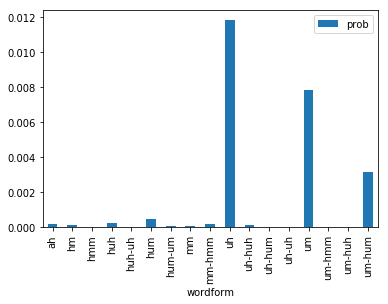

In [283]:
freq_df.plot(x='wordform', y='prob',kind='bar')

In [277]:
?freq_df.loc

,freq,prob,wordform
0,43,0.000199,ah
1,23,0.000106,hm
2,5,0.000023,hmm
3,51,0.000236,huh
4,1,0.000005,huh-uh
5,108,0.000500,hum
6,15,0.000069,hum-um
7,16,0.000074,mm
8,41,0.000190,mm-hmm
10,27,0.000125,uh-huh


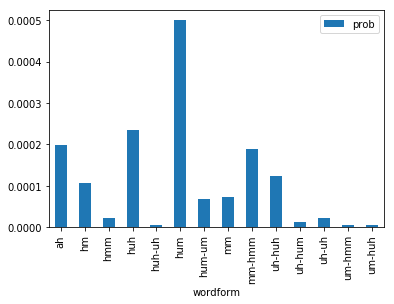

In [284]:
smallProbs = freq_df.loc[freq_df['prob'] < 0.002]
smallProbs
smallProbs.plot(x='wordform',y='prob', kind='bar')